In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans():

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()
    def cent(self):
        return self.centroids

In [11]:
import cv2

In [3]:
from google.colab import files
uploaded = files.upload()

Saving demonstration-image.PNG to demonstration-image.PNG


In [46]:
image = cv2.imread("demonstration-image.PNG")

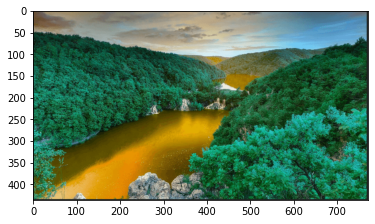

In [50]:
from google.colab.patches import cv2_imshow
plt.figure(figsize=(6, 6))
plt.imshow(image)

In [51]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

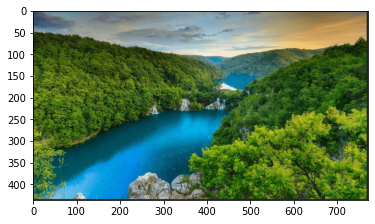

In [52]:
plt.figure(figsize=(6, 6))
plt.imshow(image)

In [6]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

In [7]:
print(pixel_values.shape)

(336592, 3)


In [12]:
k = KMeans(K=3, max_iters=100) 
y_pred = k.predict(pixel_values)
k.cent()

array([[ 52.33562851,  87.11623383,  30.71857262],
       [ 13.03598499, 134.39547729, 185.26257324],
       [153.30374146, 160.25224304, 128.49607849]])

In [13]:
centers = np.uint8(k.cent())

In [30]:
centers

array([[ 52,  87,  30],
       [ 13, 134, 185],
       [153, 160, 128]], dtype=uint8)

In [14]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [35]:
y_pred = y_pred.astype(int)

In [36]:
np.unique(y_pred)

array([0, 1, 2])

In [37]:
labels = y_pred.flatten()

In [38]:
segmented_image = centers[labels.flatten()]

In [39]:
segmented_image = segmented_image.reshape(image.shape)

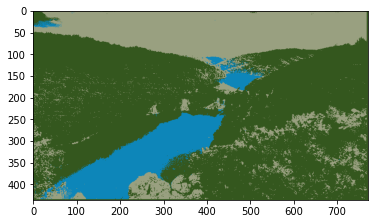

In [40]:
plt.imshow(segmented_image)
plt.show()

In [41]:
masked_image = np.copy(image)

In [42]:
masked_image = masked_image.reshape((-1, 3))

In [43]:
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]

In [44]:
masked_image = masked_image.reshape(image.shape)

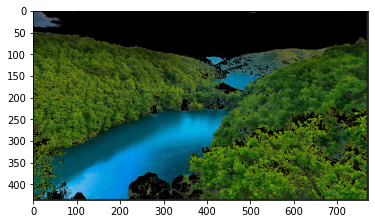

In [45]:
plt.imshow(masked_image)
plt.show()